# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   Saya menggunakan dataset : https://www.kaggle.com/datasets/mustafaoz158/telco-customer-churn


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
df = pd.read_csv('Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:

def clean_column_names(df):
    """
    Cleans DataFrame column names by:
    - Replacing spaces and hyphens with underscores,
    - Converting to lowercase,
    - Removing non-alphanumeric characters (excluding underscores).

    Args:
        df: pandas DataFrame.

    Returns:
        pandas DataFrame with cleaned column names.
    """
    cleaned_columns = []
    for col in df.columns:
        cleaned_col = col.strip()
        cleaned_col = re.sub(r'[\s\-]+', '_', cleaned_col)
        cleaned_col = re.sub(r'[^\w]', '', cleaned_col)
        cleaned_col = cleaned_col.lower()
        cleaned_columns.append(cleaned_col)
    df.columns = cleaned_columns
    return df

df = clean_column_names(df)
print(df.columns)


Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:

# Tinjau jumlah baris dan kolom dalam dataset
df.shape

(7043, 21)

In [7]:

df.describe(include = 'all')

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [8]:

# memeriksa missing value
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


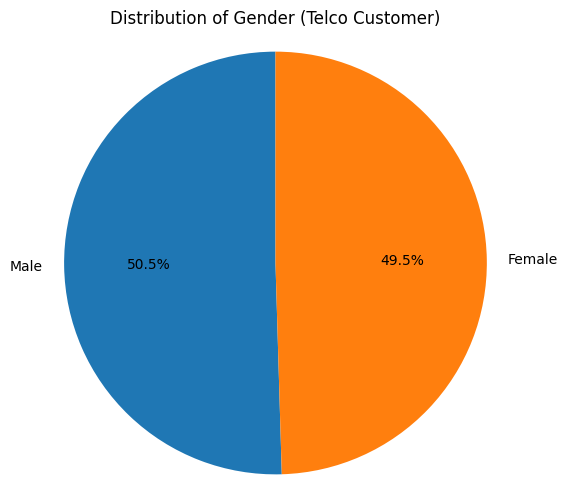

In [9]:

gender_counts = df['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Gender (Telco Customer)')
plt.axis('equal')
plt.show()


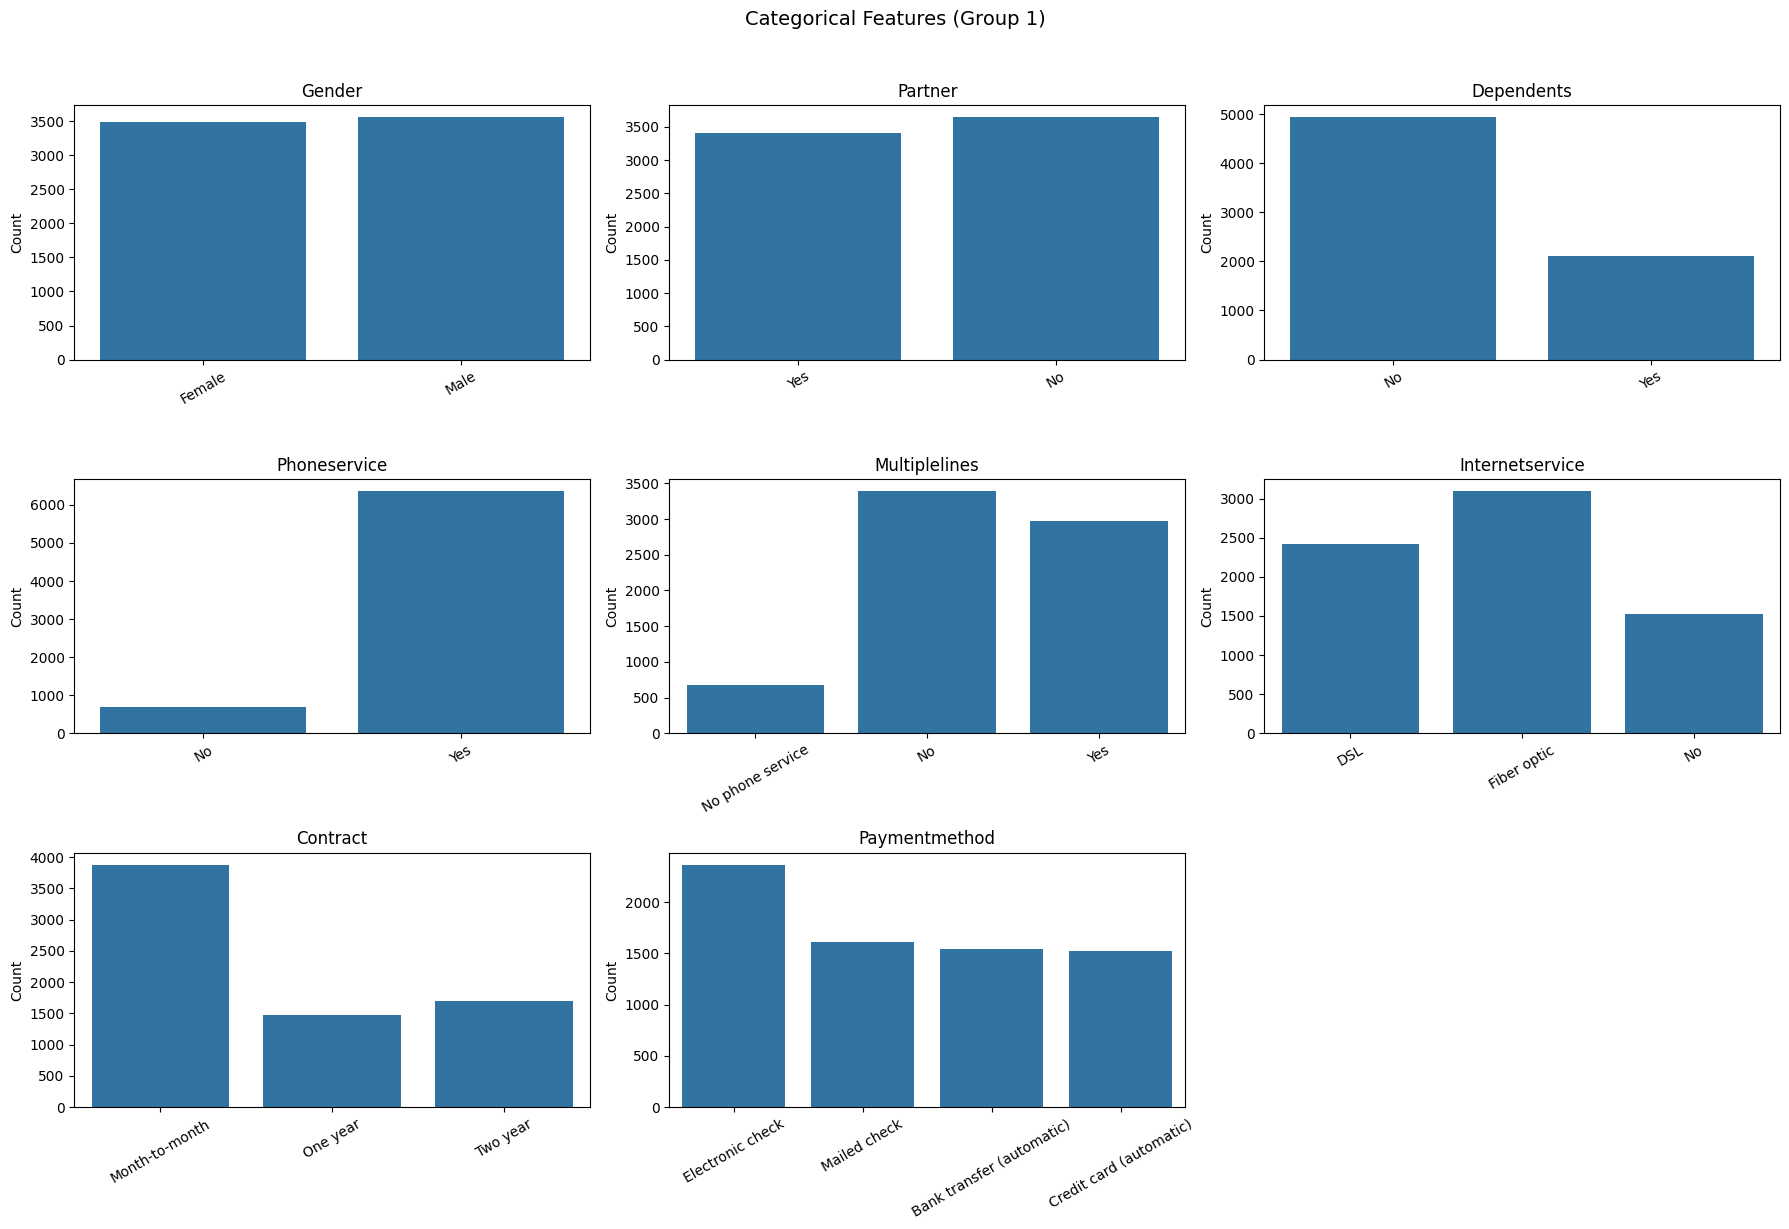

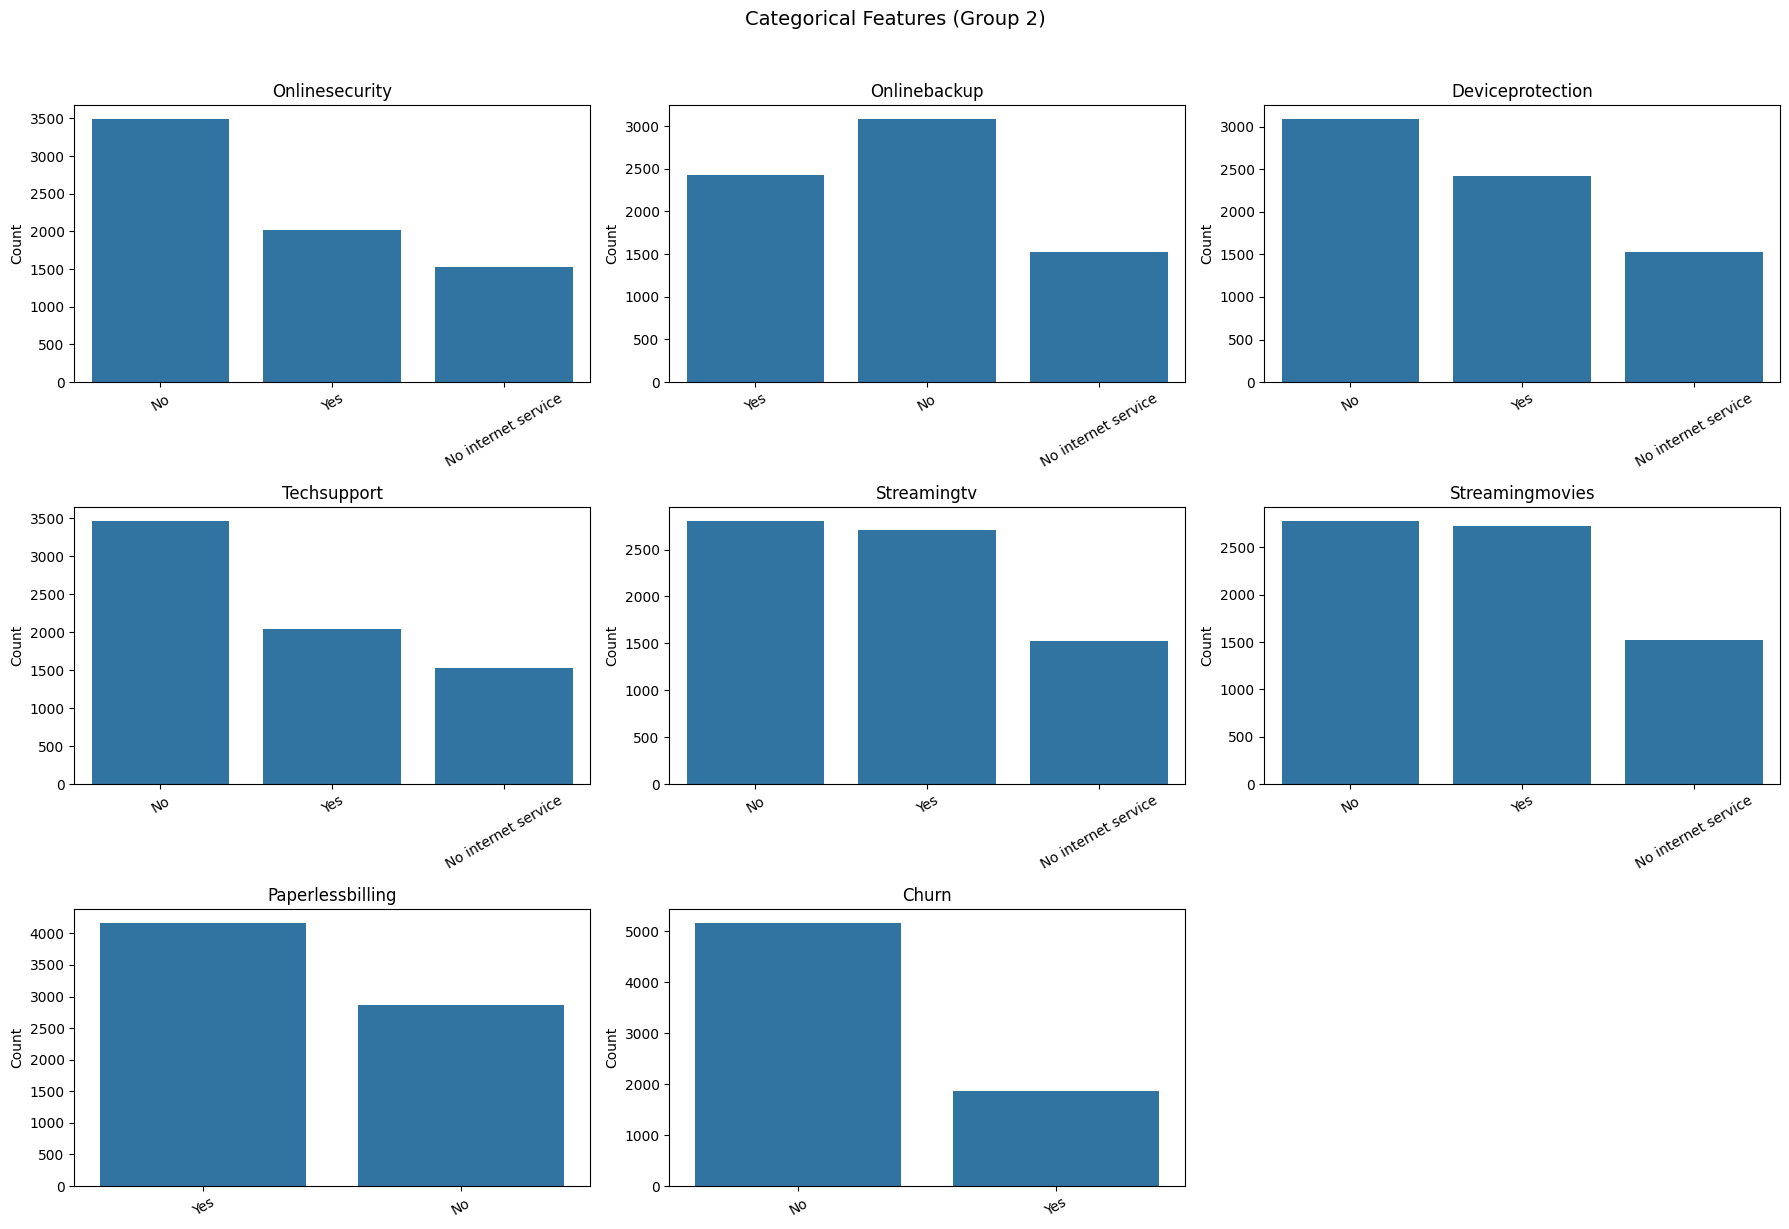

In [10]:
group1 = ["gender","partner","dependents","phoneservice","multiplelines","internetservice","contract","paymentmethod"]
group2 = ["onlinesecurity","onlinebackup","deviceprotection","techsupport","streamingtv","streamingmovies","paperlessbilling","churn"]

def plot_cat(cols, title):
    import math
    n_cols = 3
    n_rows = math.ceil(len(cols) / n_cols)
    plt.figure(figsize=(18, 4*n_rows))
    for i, c in enumerate(cols):
        plt.subplot(n_rows, n_cols, i+1)
        sns.countplot(data=df, x=c)
        plt.title(c.replace("_"," ").title())
        plt.xticks(rotation=30)
        plt.xlabel("")
        plt.ylabel("Count")
    plt.suptitle(title, y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()

plot_cat(group1, "Categorical Features (Group 1)")
plot_cat(group2, "Categorical Features (Group 2)")


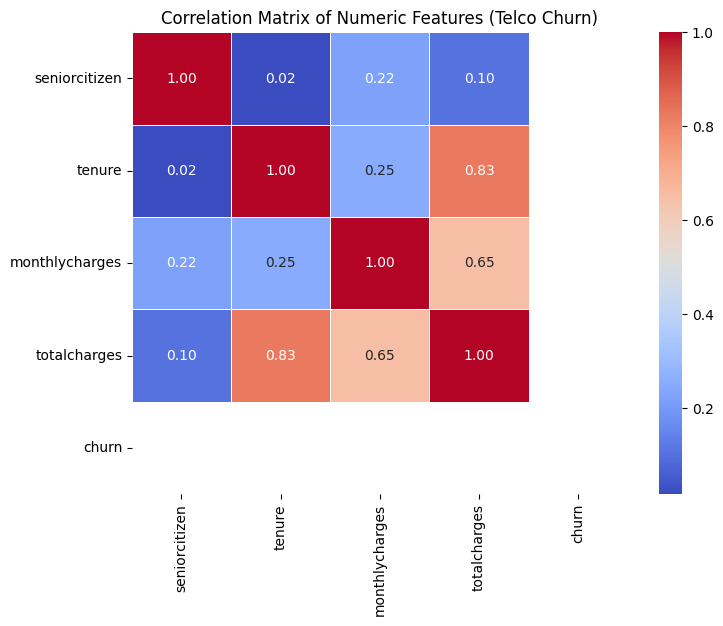

In [11]:
df_corr = df.copy()

df_corr["churn"] = df_corr["churn"].map({"no": 0, "yes": 1})

# Pastikan totalcharges numerik
df_corr["totalcharges"] = pd.to_numeric(df_corr["totalcharges"], errors="coerce")

# Ambil hanya kolom numerik
numeric_cols = df_corr.select_dtypes(include=["int64", "float64"]).columns

# Hitung matriks korelasi
correlation_matrix = df_corr[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix of Numeric Features (Telco Churn)")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
df_prep = df.copy()

# Pastikan kolom target ada
assert "churn" in df_prep.columns, "Kolom target 'churn' tidak ditemukan."

if "totalcharges" in df_prep.columns:
    df_prep["totalcharges"] = pd.to_numeric(df_prep["totalcharges"], errors="coerce")

# Encode target churn jadi 0/1
df_prep["churn"] = (
    df_prep["churn"]
    .astype(str).str.strip().str.lower()
    .map({"no": 0, "yes": 1})
)

# Validasi churn
if df_prep["churn"].isnull().any():
    raise ValueError("Ada nilai churn selain Yes/No. Cek df_prep['churn'].unique()")

print("Missing values (raw check - top 10):")
print(df_prep.isnull().sum().sort_values(ascending=False).head(10))


Missing values (raw check - top 10):
totalcharges      11
gender             0
seniorcitizen      0
partner            0
customerid         0
dependents         0
tenure             0
multiplelines      0
phoneservice       0
onlinesecurity     0
dtype: int64


In [13]:
before = len(df_prep)
df_prep = df_prep.drop_duplicates()
after = len(df_prep)

print(f"Duplicate rows removed: {before - after}")

if "customerid" in df_prep.columns:
    df_prep = df_prep.drop(columns=["customerid"])
    print("Dropped column: customerid")


Duplicate rows removed: 0
Dropped column: customerid


In [16]:
# Pisahkan fitur & target
X = df_prep.drop(columns=["churn"])
y = df_prep["churn"]

# Tentukan kolom numerik & kategorikal
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

# Split (stratify penting)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Impute + Scale numerik
num_imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()

X_train_num = num_imputer.fit_transform(X_train[num_cols]) if num_cols else np.empty((len(X_train), 0))
X_test_num  = num_imputer.transform(X_test[num_cols]) if num_cols else np.empty((len(X_test), 0))

X_train_num_scaled = scaler.fit_transform(X_train_num) if num_cols else X_train_num
X_test_num_scaled  = scaler.transform(X_test_num) if num_cols else X_test_num

print("Numeric impute + scaling done.")
print("Train numeric shape:", X_train_num_scaled.shape)
print("Test numeric shape :", X_test_num_scaled.shape)


Numeric columns: ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']
Categorical columns: ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
Numeric impute + scaling done.
Train numeric shape: (5634, 4)
Test numeric shape : (1409, 4)


In [17]:

def iqr_clip_array(arr, factor=1.5):
    """
    Clip array per kolom pakai IQR (berbasis statistik dari train).
    Return: clipped_arr, (q1, q3) untuk dipakai ke test.
    """
    if arr.shape[1] == 0:
        return arr, None

    q1 = np.quantile(arr, 0.25, axis=0)
    q3 = np.quantile(arr, 0.75, axis=0)
    iqr = q3 - q1
    low = q1 - factor * iqr
    high = q3 + factor * iqr
    clipped = np.clip(arr, low, high)
    return clipped, (q1, q3, low, high)

# Ambil numerik mentah + imputasi (pakai imputer dari Cell 3)
X_train_num_raw = num_imputer.transform(X_train[num_cols]) if num_cols else np.empty((len(X_train), 0))
X_test_num_raw  = num_imputer.transform(X_test[num_cols]) if num_cols else np.empty((len(X_test), 0))

# Fit clip di train, apply ke test
X_train_num_clipped, clip_stats = iqr_clip_array(X_train_num_raw, factor=1.5)

if clip_stats is not None:
    _, _, low, high = clip_stats
    X_test_num_clipped = np.clip(X_test_num_raw, low, high)
else:
    X_test_num_clipped = X_test_num_raw

# Scaling ulang setelah clipping (pakai scaler baru agar konsisten)
scaler2 = StandardScaler()
X_train_num_scaled = scaler2.fit_transform(X_train_num_clipped) if num_cols else X_train_num_clipped
X_test_num_scaled  = scaler2.transform(X_test_num_clipped) if num_cols else X_test_num_clipped

print("Outlier clipping (IQR) applied + re-scaling done.")
print("Train numeric shape:", X_train_num_scaled.shape)
print("Test numeric shape :", X_test_num_scaled.shape)


Outlier clipping (IQR) applied + re-scaling done.
Train numeric shape: (5634, 4)
Test numeric shape : (1409, 4)


In [18]:

# Imputer utk kategorikal
cat_imputer = SimpleImputer(strategy="most_frequent")

X_train_cat = cat_imputer.fit_transform(X_train[cat_cols]) if cat_cols else np.empty((len(X_train), 0), dtype=object)
X_test_cat  = cat_imputer.transform(X_test[cat_cols]) if cat_cols else np.empty((len(X_test), 0), dtype=object)

# OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_cat_ohe = ohe.fit_transform(X_train_cat) if cat_cols else np.empty((len(X_train), 0))
X_test_cat_ohe  = ohe.transform(X_test_cat) if cat_cols else np.empty((len(X_test), 0))

print("Categorical impute + one-hot done.")
print("Train cat shape:", X_train_cat_ohe.shape)
print("Test cat shape :", X_test_cat_ohe.shape)


Categorical impute + one-hot done.
Train cat shape: (5634, 41)
Test cat shape : (1409, 41)


In [19]:

X_train_extra = pd.DataFrame(index=X_train.index)
X_test_extra = pd.DataFrame(index=X_test.index)

if "tenure" in X_train.columns:
    # Cut ke 4 bin (contoh yang umum)
    bins = [-1, 12, 24, 48, np.inf]
    labels = ["0-12", "13-24", "25-48", "49+"]

    X_train_extra["tenure_bin"] = pd.cut(X_train["tenure"], bins=bins, labels=labels)
    X_test_extra["tenure_bin"]  = pd.cut(X_test["tenure"], bins=bins, labels=labels)

    # Impute + OHE untuk tenure_bin
    tb_imputer = SimpleImputer(strategy="most_frequent")
    train_tb = tb_imputer.fit_transform(X_train_extra[["tenure_bin"]])
    test_tb  = tb_imputer.transform(X_test_extra[["tenure_bin"]])

    tb_ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    train_tb_ohe = tb_ohe.fit_transform(train_tb)
    test_tb_ohe  = tb_ohe.transform(test_tb)

    print("Binning tenure done:", X_train_extra["tenure_bin"].value_counts(dropna=False).to_dict())
else:
    train_tb_ohe = np.empty((len(X_train), 0))
    test_tb_ohe  = np.empty((len(X_test), 0))
    print("Kolom 'tenure' tidak ditemukan, binning dilewati.")

# ===== Final join (numeric_scaled + cat_ohe + bin_ohe)
X_train_final = np.hstack([X_train_num_scaled, X_train_cat_ohe, train_tb_ohe])
X_test_final  = np.hstack([X_test_num_scaled,  X_test_cat_ohe,  test_tb_ohe])

print("\nFinal dataset ready!")
print("Train final shape:", X_train_final.shape)
print("Test final shape :", X_test_final.shape)

# ===== Save
out_dir = "dataset_preprocessing"
os.makedirs(out_dir, exist_ok=True)

pd.DataFrame(X_train_final).to_csv(f"{out_dir}/X_train.csv", index=False)
pd.DataFrame(X_test_final).to_csv(f"{out_dir}/X_test.csv", index=False)
pd.DataFrame(y_train).to_csv(f"{out_dir}/y_train.csv", index=False)
pd.DataFrame(y_test).to_csv(f"{out_dir}/y_test.csv", index=False)

print(f"\nFiles saved to: {out_dir}/")


Binning tenure done: {'49+': 1789, '0-12': 1737, '25-48': 1290, '13-24': 818}

Final dataset ready!
Train final shape: (5634, 49)
Test final shape : (1409, 49)

Files saved to: dataset_preprocessing/
